# IS 362 - Week 8 Assignment
### by Bogdan Popa

In this week's assignment we will look and analyse the auto-mpg data from https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [13]:
#import pands, numby, and pyplot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#read the data file
data = pd.read_fwf("auto-mpg.data", header=None)

#display data
data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


#### No Headers

The data does not have any headers.

Therefore using the information from the data description file I will add heards to each column.

In [14]:
#Adding headers
data.columns =["Mpg","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin","Car Name"]

#Displaying the data
data.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


#### Missing values

The horsepower column uses the "?" symbol in place of missing values.


In [15]:
#Searching for all the missing values in the Horsepower column
data.loc[data['Horsepower']=='?']


,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


Next, I will replace all the "?" values with the NaN (null)) value. After which I will convert the Horsepower column type to a float.

In [16]:
#Searching and replacing all "?" with NaN
data['Horsepower']=data['Horsepower'].replace('?', np.NaN)

#Converting the Hosepower column type to float
data["Horsepower"]=data["Horsepower"].astype(str).astype('float')

#Display the collumn type.
print(data.dtypes)

#Serarching for all null value in the Horsepower collumn to make sure the values changed from '?'
data[data['Horsepower'].isnull()]

Mpg             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object


,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,"""amc concord dl"""


#### Renaming the Origin codes

Next, I replace the codes from the Origin column with the corresponding information

In [17]:
#replacing the Origin codes
data['Origin']=data['Origin'].replace(1, 'USA')
data['Origin']=data['Origin'].replace(2, 'Europe')
data['Origin']=data['Origin'].replace(3, 'Asia')

data.head(20)

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA,"""amc ambassador dpl"""


### Generating charts to visualize data

First I will generate a bar chart to showcase the distribution of cylinders across all cars.

<AxesSubplot:title={'center':'Distribution of Cylinders'}, ylabel='Cylinders'>

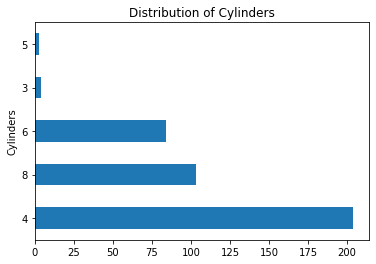

In [18]:
data['Cylinders'].value_counts().plot(kind="barh",title="Distribution of Cylinders",ylabel="Cylinders")

Next, I will create a scatter plot to visualize the relationshhip betweeen horsepower and weight.

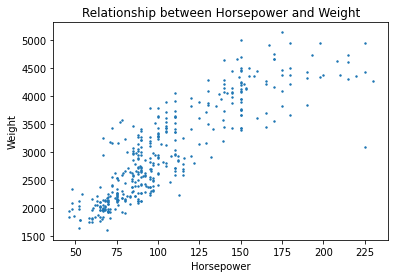

In [19]:
dsc=plt.scatter(data.Horsepower,data.Weight,s=2)

plt.title('Relationship between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')

dsc

Lastly, I will use a scatter plot again to display the relationship between miles per gallon and the car's weight.

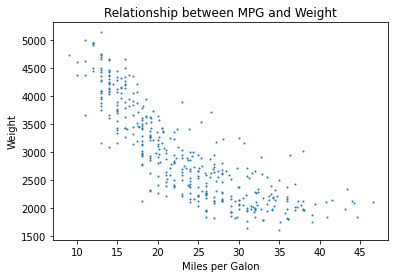

In [20]:
dsc2=plt.scatter(data.Mpg,data['Weight'],s=1)

plt.title('Relationship between MPG and Weight')
plt.xlabel('Miles per Galon')
plt.ylabel('Weight')

dsc2